1.
Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [169]:
# Importando Librerias de regresion lineal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
conjuntoDatos = pd.read_csv('./DatasetVehicle/Car details v3.csv')
conjuntoDatos.head(50)



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


c:\Users\GabrielIsaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


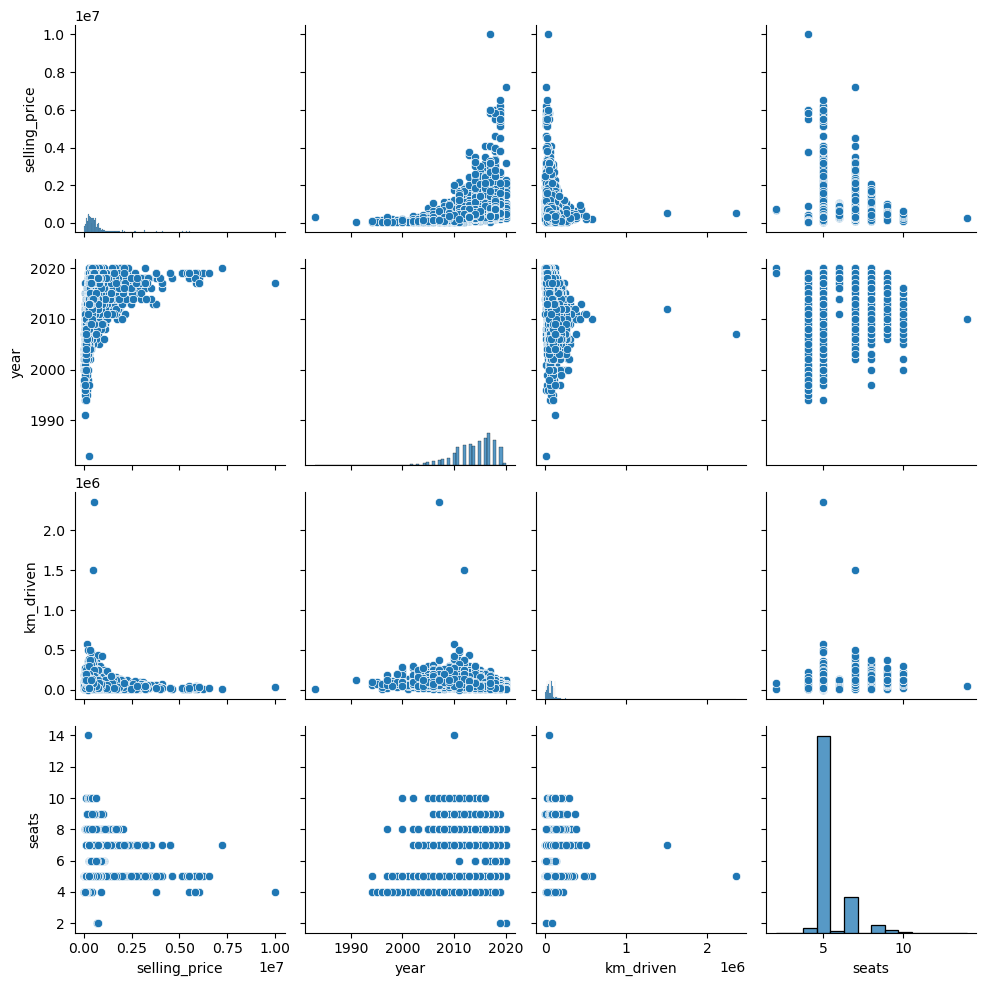

In [196]:
sns.pairplot(conjuntoDatos[['selling_price','year','km_driven','seats']])
mplot.show()

In [26]:
conjuntoDatos.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

In [27]:
conjuntoDatos.info()
print("---------------------------------------------------------")
print("Cantidad de registros null en la columna Nombre:", conjuntoDatos['name'].isna().sum())
print("Cantidad de registros 0 en la columna Año:", conjuntoDatos['year'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Precio:", conjuntoDatos['selling_price'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Kilometros recorridos:", conjuntoDatos['km_driven'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Combustible:", conjuntoDatos['fuel'].isin([0]).sum())
print("Cantidad de registros null en la columna Tipo vendedor:", conjuntoDatos['seller_type'].isna().sum())
print("Cantidad de registros null en la columna Transmisión:", conjuntoDatos['transmission'].isna().sum())
print("Cantidad de registros null en la columna Dueño:", conjuntoDatos['owner'].isna().sum())
print("Cantidad de registros 0 en la columna kilometraje:", conjuntoDatos['mileage'].isna().sum())
print("Cantidad de registros 0 en la columna Motor:", conjuntoDatos['engine'].isna().sum())
print("Cantidad de registros 0 en la columna Maxima Potencia:", conjuntoDatos['max_power'].isna().sum())
print("Cantidad de registros null en la columna Torque:", conjuntoDatos['torque'].isna().sum())
print("Cantidad de registros null en la columna pasajeros:", conjuntoDatos['seats'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
---------------------------------------------------------
Cantidad de registros null en la columna Nombre: 0
Cantidad de registros 0 en la columna Año: 0
Cantidad de reg

In [28]:
valores_seats = conjuntoDatos["seats"].mean()
imputar_valores = {"mileage":"desconocido",
                   "engine":"desconocido",
                   "max_power":"desconocido",
                   "torque":"desconocido",
                   "seats": valores_seats}
datos_Imputados = (conjuntoDatos.fillna(value = imputar_valores))
datos_Imputados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [29]:
datos_Imputados.info()
print("---------------------------------------------------------")
print("Cantidad de registros null en la columna Nombre:", datos_Imputados['name'].isna().sum())
print("Cantidad de registros 0 en la columna Año:", datos_Imputados['year'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Precio:", datos_Imputados['selling_price'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Kilometros recorridos:", datos_Imputados['km_driven'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Combustible:", datos_Imputados['fuel'].isin([0]).sum())
print("Cantidad de registros null en la columna Tipo vendedor:", datos_Imputados['seller_type'].isna().sum())
print("Cantidad de registros null en la columna Transmisión:", datos_Imputados['transmission'].isna().sum())
print("Cantidad de registros null en la columna Dueño:", datos_Imputados['owner'].isna().sum())
print("Cantidad de registros 0 en la columna kilometraje:", datos_Imputados['mileage'].isna().sum())
print("Cantidad de registros 0 en la columna Motor:", datos_Imputados['engine'].isna().sum())
print("Cantidad de registros 0 en la columna Maxima Potencia:", datos_Imputados['max_power'].isna().sum())
print("Cantidad de registros null en la columna Torque:", datos_Imputados['torque'].isna().sum())
print("Cantidad de registros null en la columna pasajeros:", datos_Imputados['seats'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
---------------------------------------------------------
Cantidad de registros null en la columna Nombre: 0


Cantidad de registros 0 en la columna Año: 0
Cantidad de registros 0 en la columna Precio: 0
Cantidad de registros 0 en la columna Kilometros recorridos: 0
Cantidad de registros 0 en la columna Combustible: 0
Cantidad de registros null en la columna Tipo vendedor: 0
Cantidad de registros null en la columna Transmisión: 0
Cantidad de registros null en la columna Dueño: 0
Cantidad de registros 0 en la columna kilometraje: 0
Cantidad de registros 0 en la columna Motor: 0
Cantidad de registros 0 en la columna Maxima Potencia: 0
Cantidad de registros null en la columna Torque: 0
Cantidad de registros null en la columna pasajeros: 0


In [143]:
datos_Imputados.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.000000
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.000000
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.000000
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.000000


In [144]:
datos_Imputados['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

c:\Users\GabrielIsaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


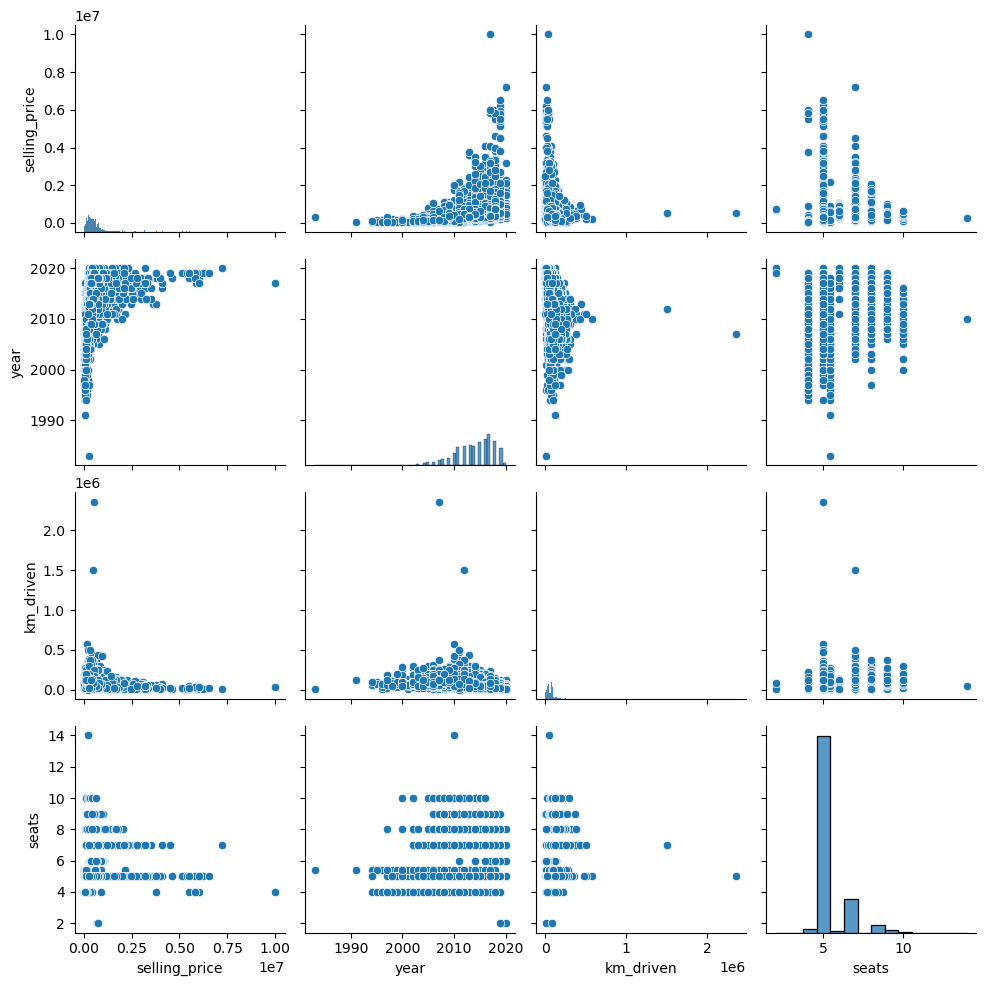

In [197]:
sns.pairplot(datos_Imputados[['selling_price','year','km_driven','seats']])
mplot.show()

In [186]:
datos_ = datos_Imputados[['selling_price', 'km_driven', 'year', 'seats']]
#datos_ = datos_Imputados[['selling_price', 'km_driven']]
X = datos_.drop('selling_price',axis=1)
Y = datos_['selling_price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

c:\Users\GabrielIsaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


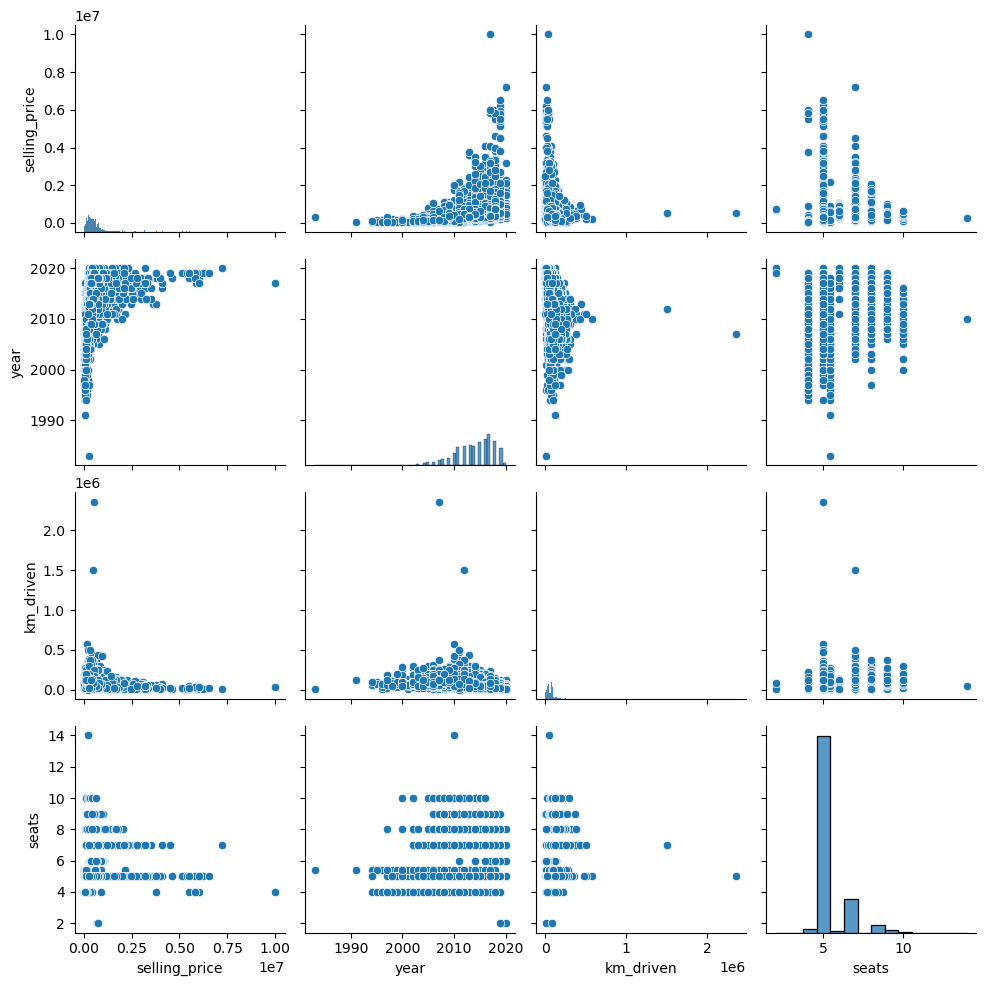

In [198]:
sns.pairplot(datos_[['selling_price','year','km_driven','seats']])
mplot.show()

In [187]:
print(X_train)

      km_driven  year  seats
4313      40000  2012    5.0
5178     120000  2007    5.0
758       80000  2013    5.0
7117     100000  2016    9.0
2606      77000  2013    5.0
...         ...   ...    ...
4931      70000  2012    5.0
3264     100000  2012    5.0
1653      90000  2009    5.0
2607      90000  2012    5.0
2732     110000  2012    5.0

[6096 rows x 3 columns]


In [188]:
print(X_test)

      km_driven  year  seats
3558      40000  2013    5.0
233       70000  2013    7.0
7952       5000  2019    5.0
572      120000  2004    5.0
6960      20000  2019    5.0
...         ...   ...    ...
2761     220000  2004    4.0
1487      90000  2006    5.0
4284      80000  2012    5.0
5698      80000  2012    5.0
4643      40000  2014    5.0

[2032 rows x 3 columns]


In [189]:
X_train.shape


(6096, 3)

In [190]:
X_test.shape

(2032, 3)

In [152]:
ejeX = "selling_price"
ejeY = "km_driven"

In [191]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, Y_train)
prediccion = regresion_lineal.predict(X_test)


In [192]:

R_cuadrado = r2_score(Y_test, prediccion)
print(f"Coeficiente de determinacion: {R_cuadrado}")

Coeficiente de determinacion: 0.17691053704866966


In [193]:
print(Y_test)

3558     345000
233      900000
7952     475000
572      120000
6960    5150000
         ...   
2761      70000
1487     160000
4284     350000
5698     380000
4643     260000
Name: selling_price, Length: 2032, dtype: int64


In [194]:
print(list(prediccion))

[585650.4653777778, 651155.5032354593, 1081380.997103572, -185621.97422024608, 1066284.6469166875, 825967.5561472178, 927135.447040379, 97599.38931718469, 876259.638823539, -470025.0188792348, 815903.3226892948, 198132.78796565533, 958159.3129841685, 726724.7745510936, 208197.02142357826, 834850.1084835827, 651155.5032354593, -86095.21593093872, 984501.5777505636, 612080.2505253255, 322273.1580362618, 425366.3752398193, 208197.02142357826, 384299.69138768315, 939284.8495571911, 392898.0500175059, -212051.7593677938, 674679.7826336026, 1083606.1991211176, 830999.6728761792, 540657.0230535865, 458578.34565097094, 351634.6928400099, 892654.275126487, 105016.28383883834, 174796.13433513045, -52248.53626173735, 884602.8883601427, 555457.765004009, 959340.9941057563, 984501.5777505636, 799303.3760237992, 524083.38350865245, 1166061.0366456509, 305076.44077661633, 371763.1597558558, 919192.9962047935, 708959.6698783636, 819929.0160724819, 736133.1002147496, 834850.1084835827, 555457.765004009

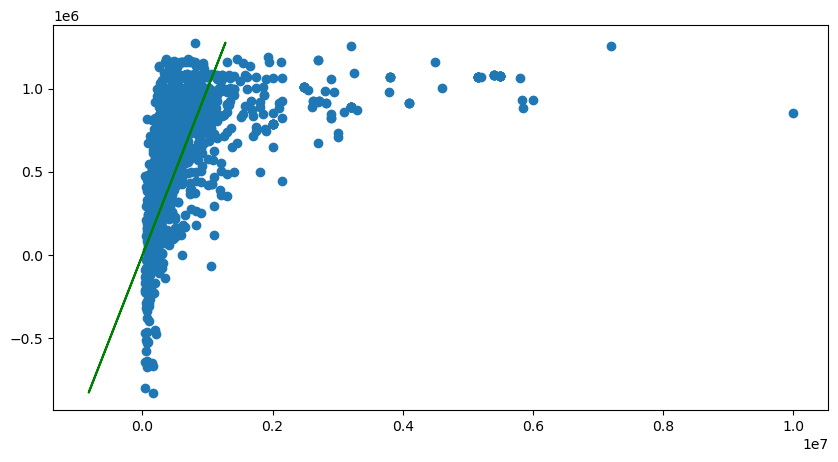

In [195]:
mplot.figure(figsize = (10,5))
mplot.scatter(Y_test, prediccion)
mplot.plot(prediccion, prediccion, color = "green")
mplot.show()

In [202]:
matrizConfusion = confusion_matrix(Y_test,prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = matrizConfusion, display_labels= class_names)
disp.plot()


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets